# OpenCV 基础操作

## 一、静态图像处理
### 1. 图像读取与显示
这部分内容主要介绍如何使用OpenCV读取和显示图像，它是图像处理的基础环节，为后续的各种复杂处理操作奠定了基石。在实际应用中，图像的读取与显示不仅是展示图像内容的直观方式，更是确保后续处理流程能够正确执行的关键步骤。

在图像读取方面，OpenCV提供了`cv2.imread`函数，该函数是获取图像数据的核心工具。它接受两个主要参数：第一个参数`filename`用于指定要读取的图像文件路径，可以是相对路径或绝对路径，支持常见的图像格式，如`.jpg`、`.png`、`.bmp`等；第二个参数`flags`用于设定图像的读取模式，常用模式包括：
- `cv2.IMREAD_COLOR`：以彩色模式读取图像，忽略透明度通道，是默认的读取模式，适用于大多数彩色图像的读取场景；
- `cv2.IMREAD_GRAYSCALE`：将图像以灰度模式读取，此时图像仅包含亮度信息，可用于简化图像处理流程、减少计算量，如在一些仅关注图像亮度特征的任务中使用；
- `cv2.IMREAD_UNCHANGED`：读取包含透明度通道的图像，完整保留图像的所有信息，适用于处理带有透明背景或需要保留alpha通道的图像。

在图像显示环节，OpenCV提供了`cv2.imshow`函数，该函数可以在窗口中展示图像。它接受两个参数，第一个参数是窗口名称，用于标识显示图像的窗口，通过相同的窗口名称可以在后续操作中对该窗口进行控制；第二个参数则是要显示的图像数据。同时，为了确保窗口能够正常显示并等待用户交互，通常会搭配`cv2.waitKey`函数使用，该函数用于设定等待按键事件的时间（单位为毫秒），当参数设为0时，表示无限等待，直至用户按下键盘上的任意键；最后使用`cv2.destroyAllWindows`函数关闭所有由OpenCV创建的窗口，释放相关资源。

此外，由于OpenCV采用BGR颜色空间存储彩色图像，而Matplotlib等常用可视化库使用RGB颜色空间，因此在使用Matplotlib显示OpenCV读取的彩色图像时，需要使用`cv2.cvtColor`函数将图像从BGR颜色空间转换为RGB颜色空间，以确保图像颜色显示的正确性 。这种颜色空间的转换在跨库使用时尤为重要，能够避免因颜色空间差异导致的图像颜色失真问题。 

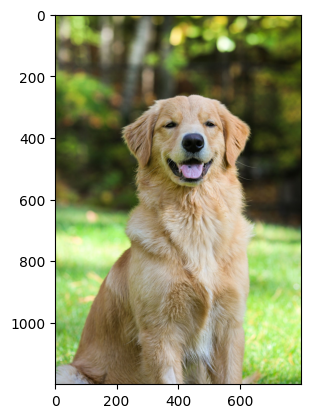

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 步骤一、读取图像
# cv2.imread方法用于读取图像，它有两个主要参数：
#   - filename: 要读取的图像文件的路径。
#   - flags: 读取图像的模式，常用的值有：
#       - cv2.IMREAD_COLOR: 以彩色模式读取图像，默认值，忽略图像的透明度通道。
#       - cv2.IMREAD_GRAYSCALE: 以灰度模式读取图像。
#       - cv2.IMREAD_UNCHANGED: 以包含透明度通道的模式读取图像。
img_1 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_GRAYSCALE)
img_3 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_UNCHANGED)
# 步骤二、显示图像
"""
# OpenCV自带的方法
# 检查图像是否成功读取
CV_image = img_1 # 这边可以选择看看上面三个图像的不同之处
if CV_image is None:
    print("无法读取图像，请检查文件路径和文件名。")
else:

    # 显示图像
    # cv2.imshow 用于显示图像，第一个参数为窗口名称，第二个参数为要显示的图像
    # cv2.imshow('Displayed Image', CV_image)
    # 等待按键事件
    # cv2.waitKey 用于等待按键事件，参数为等待时间（毫秒），0 表示无限等待
    # cv2.waitKey(0)
    # 关闭所有窗口
    # cv2.destroyAllWindows 用于关闭所有由 OpenCV 创建的窗口
    # cv2.destroyAllWindows()
"""
# 使用matplotlib的pyplot来显示图像
# plt.imshow方法用于显示图像，它有以下主要参数：
#   - X: 要显示的图像数组，可以是二维（灰度图像）或三维（彩色图像）。
#   - cmap: 颜色映射，对于灰度图像，常用的是'gray'。
#   - interpolation: 插值方法，用于调整图像的显示质量。
# 由于OpenCV使用BGR颜色模式，而matplotlib使用RGB颜色模式，所以需要转换颜色通道
# 使用cv2.cvtColor方法将BGR图像转换为RGB图像
# cv2.cvtColor方法用于颜色空间转换，它有两个主要参数：
#   - src: 要转换的图像数组。
#   - code: 转换的代码，常用的值有：
#       - cv2.COLOR_BGR2RGB: 将BGR图像转换为RGB图像。
#       - cv2.COLOR_BGR2GRAY: 将BGR图像转换为灰度图像。

OpenCV_image = img_1 # 这边可以选择看看上面几个图像的不同之处
img_rgb = cv2.cvtColor(OpenCV_image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(OpenCV_image, cv2.COLOR_BGR2GRAY) # 注意传入的就是灰度图像时注释掉这句

plt_image = img_rgb # 这里可以选择使用img_rgb或img_gray
plt.imshow(plt_image)
#plt.imshow(plt_image, cmap='gray') # 选择使用img_gray时用这句
plt.show()

### 2. 图像滤波
在图像处理过程中，图像滤波是提升图像质量、提取图像特征的关键技术，旨在通过特定算法改变图像像素值，实现降噪、增强、边缘检测等目的。这部分代码主要围绕卷积运算、边界填充以及多种经典滤波方法展开，具体内容如下：

#### 卷积运算与边界填充
- **卷积运算**：卷积运算是图像滤波的核心操作之一，对于二维图像 $I(x, y)$ 和二维卷积核 $K(m, n)$ ，其卷积运算定义为：
$$
(I * K)(x, y) = \sum_{m}\sum_{n} I(x + m, y + n)K(m, n)
$$
通过将卷积核（一个小的二维矩阵）在图像上滑动，对每个位置的邻域像素进行加权求和，从而改变图像的像素值。不同的卷积核可以实现不同的图像处理效果，如模糊、锐化、边缘检测等。在代码中，通常使用 `cv2.filter2D` 函数来执行卷积运算，该函数接收输入图像、卷积核以及输出图像深度等参数。例如，构建一个均值卷积核并应用于图像，能够实现图像的模糊效果；构建拉普拉斯卷积核，则可以用于检测图像中的边缘。
 - **边界填充**：在进行卷积运算时，由于卷积核会访问图像边界外的区域，因此需要对图像边界进行处理，常见的方式是边界填充。通过 `cv2.copyMakeBorder` 函数可以实现多种填充策略，如常量填充（用固定值 $c$ 填充边界，即对于边界像素 $I(x, y)$ ，若 $(x, y)$ 在边界区域，则 $ I(x, y) = c $ 、复制填充（复制边界像素值进行填充，若 $(x, y)$ 在边界外，假设其对应边界内的最近像素为 $(x', y')$ ，则 $I(x, y) = I(x', y')$ 等 。不同的填充方式会影响卷积运算的结果，合理选择填充方式能够避免边界效应，使滤波后的图像更加自然。例如，在均值滤波中，若不进行边界填充，图像边缘部分的滤波效果可能与内部区域不一致，而采用合适的填充方式后，能够获得更均匀的滤波效果。

#### 均值滤波、高斯滤波、中值滤波、双边滤波
- **均值滤波**：均值滤波是一种简单的线性滤波方法，对于图像 $I(x, y)$ ，其均值滤波结果 $\overline{I}(x, y)$ 为：
$$
\overline{I}(x, y) = \frac{1}{M \times N} \sum_{m = -\frac{M}{2}}^{\frac{M}{2}} \sum_{n = -\frac{N}{2}}^{\frac{N}{2}} I(x + m, y + n)
$$
其中 $M \times N$ 是卷积核的大小，通过计算像素邻域内的平均值来替代该像素的值，从而达到平滑图像、降低噪声的目的。在代码中，使用 `cv2.blur` 函数实现均值滤波，只需指定卷积核大小即可。卷积核大小决定了参与平均的像素数量，核越大，平滑效果越明显，但同时也会导致图像细节丢失更多。例如，在处理含有少量随机噪声的图像时，均值滤波能够快速去除噪声，但对于图像中的边缘和细节，如物体的轮廓、纹理等，也会产生一定程度的模糊。
 - **高斯滤波**：高斯滤波基于高斯函数对图像进行加权平均，二维高斯函数为：
$$
G(x, y, \sigma_x, \sigma_y) = \frac{1}{2\pi\sigma_x\sigma_y} e^{-\frac{(x^2)}{2\sigma_x^2} - \frac{(y^2)}{2\sigma_y^2}}
$$
对于图像 $I(x, y)$ ，其高斯滤波结果 $I_{G}(x, y)$ 为：
$$
I_{G}(x, y) = \sum_{m}\sum_{n} I(x + m, y + n)G(m, n, \sigma_x, \sigma_y)
$$
相比于均值滤波，它对邻域内不同位置的像素赋予不同的权重，距离中心像素越近的点权重越高，因此在平滑图像的同时能够更好地保留边缘信息。在代码中，通过 `cv2.GaussianBlur` 函数实现高斯滤波，除了指定卷积核大小外，还可以设置标准差参数 $\sigma_x$ 和 $\sigma_y$（一般情况下 $\sigma_x = \sigma_y = \sigma $），该参数控制高斯分布的形状，决定了权重的分配情况。标准差越大，滤波后的图像越平滑，对噪声的抑制效果越强，但边缘的模糊程度也会相应增加。高斯滤波常用于去除符合高斯分布的噪声，在计算机视觉的图像预处理阶段应用广泛。
 - **中值滤波**：中值滤波属于非线性滤波方法，它将像素邻域内的所有像素值进行排序，取中间值作为该像素的新值。设图像 $I(x, y)$ 的邻域为 $S(x, y)$ ，其中包含 $M \times N$ 个像素值 $\{I(x + m, y + n) | m = -\frac{M}{2}, \cdots, \frac{M}{2}; n = -\frac{N}{2}, \cdots, \frac{N}{2}\}$ ，对这些像素值进行排序后，中值滤波结果 $I_{med}(x, y)$ 为排序后的中间值。这种方式对椒盐噪声（图像中出现的随机黑白噪点）有很好的抑制作用，因为椒盐噪声的像素值与周围正常像素差异较大，排序后会被中间的正常像素值替代。在代码中，使用 `cv2.medianBlur` 函数实现中值滤波，需要指定卷积核大小，该大小必须是大于 1 的奇数。中值滤波在去除噪声的同时，能够较好地保留图像的边缘和细节，不会像均值滤波那样使图像整体变得模糊，因此在处理受椒盐噪声干扰的图像时是一种常用的选择。
 - **双边滤波**：双边滤波是一种综合考虑像素空间距离和颜色差异的滤波方法，在平滑图像的同时能够有效保留边缘。它通过空间高斯函数 $G_{s}(d) = \frac{1}{2\pi\sigma_s^2} e^{-\frac{d^2}{2\sigma_s^2}}$（其中 $d$ 是像素间的空间距离，$\sigma_s$ 是空间标准差）和颜色高斯函数 $G_{r}(\Delta I) = \frac{1}{2\pi\sigma_r^2} e^{-\frac{\Delta I^2}{2\sigma_r^2}}$（其中 $\Delta I$ 是像素间的颜色差异，$\sigma_r$ 是颜色标准差）对像素进行加权。对于图像 $I(x, y)$，其双边滤波结果 $I_{bf}(x, y)$ 为：
$$
I_{bf}(x, y) = \frac{\sum_{m}\sum_{n} I(x + m, y + n)G_{s}(\sqrt{m^2 + n^2})G_{r}(|I(x + m, y + n) - I(x, y)|)}{\sum_{m}\sum_{n} G_{s}(\sqrt{m^2 + n^2})G_{r}(|I(x + m, y + n) - I(x, y)|)}
$$
空间距离近、颜色差异小的像素在滤波过程中权重更高。在代码中，使用 `cv2.bilateralFilter` 函数实现双边滤波，需要设置像素邻域直径、颜色空间滤波器的标准差 $\sigma_r$ 和坐标空间滤波器的标准差 $\sigma_s$ 等参数。双边滤波能够在去除噪声的同时，避免边缘过度模糊，适用于处理需要保留丰富细节和清晰边缘的图像，如人像处理、医学图像分析等领域。 

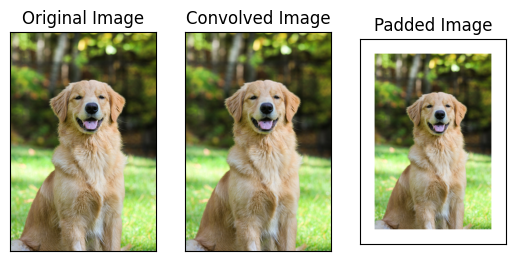

In [16]:
# 卷积运算与边界填充
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_rgb = cv2.cvtColor(cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) # 偷懒写法（布什）

# 步骤一、定义卷积核（常见尺寸分为 3x3、5x5 等）
# 卷积核是一个二维数组，用于在图像上进行卷积操作，不同的卷积核可以实现不同的图像效果，如模糊、锐化等
# 这里以 3x3 的均值卷积核为例，它可以对图像进行模糊处理
# 卷积核的每个元素表示对应位置的权重，所有权重之和通常为 1
kernel = np.ones((3, 3), np.float32) / 9
# 解释：
# - np.ones((3, 3), np.float32) 创建一个 3x3 的全 1 数组，数据类型为浮点数
# - 除以 9 是为了保证卷积核的权重之和为 1

# 步骤二、卷积运算
# cv2.filter2D 函数用于进行卷积操作，它有以下主要参数：
# - src: 输入的图像
# - ddepth: 输出图像的深度，通常设置为 -1 表示与输入图像深度相同
# - kernel: 卷积核
# - anchor: 锚点位置，默认值为 (-1, -1) 表示卷积核的中心
# - delta: 在卷积结果上添加的可选值，默认为 0
# - borderType: 边界填充类型，默认为 cv2.BORDER_DEFAULT
convolved_img = cv2.filter2D(img_rgb, -1, kernel)

# 步骤三、边界填充
# cv2.copyMakeBorder 函数用于对图像进行边界填充，它有以下主要参数：
# - src: 输入的图像
# - top, bottom, left, right: 分别表示顶部、底部、左侧、右侧的填充像素数
# - borderType: 边界填充类型，常见的有 cv2.BORDER_CONSTANT（常量填充）、cv2.BORDER_REPLICATE（复制边界像素）等
# - value: 当 borderType 为 cv2.BORDER_CONSTANT 时，指定填充的常量值
# 这里以 10 像素的常量填充为例，填充颜色为白色（255, 255, 255）
padded_img = cv2.copyMakeBorder(convolved_img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=(255, 255, 255))

# 输出图像
plt.subplot(131), plt.imshow(img_rgb), plt.title('Original Image') # 原始图像
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(convolved_img), plt.title('Convolved Image') # 卷积后的图像，可以比较明显的看出图像的模糊效果
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(padded_img), plt.title('Padded Image') # 填充后的图像，可以看到图像的边界被填充为白色
plt.xticks([]), plt.yticks([])
plt.show()

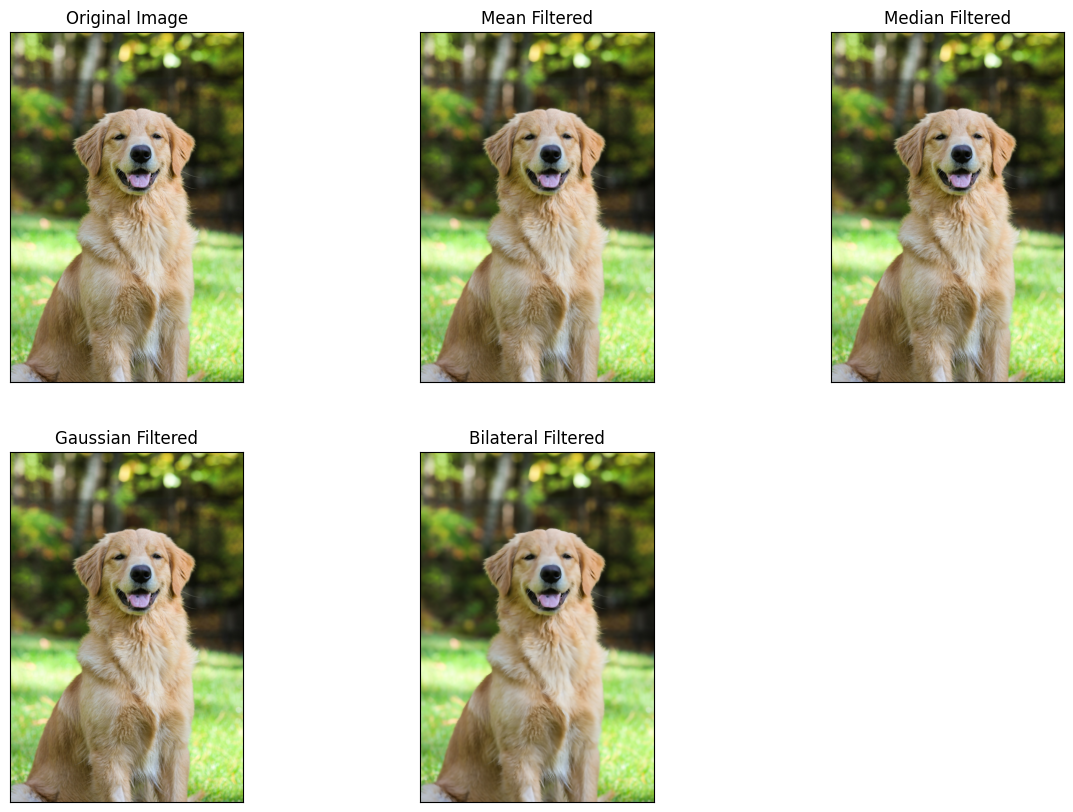

In [17]:
# 均值滤波、高斯滤波、中值滤波、双边滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 定义滤波核大小
kernel_size = 3

# 一、对图像进行均值滤波
# cv2.blur 函数用于进行均值滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，通常是一个元组 (width, height)，这里使用 (kernel_size, kernel_size)
# - anchor: 锚点位置，默认值为 (-1, -1) 表示卷积核的中心
# - borderType: 边界填充类型，默认为 cv2.BORDER_DEFAULT
mean_filtered = cv2.blur(img_rgb, (kernel_size, kernel_size))

# 二、对图像进行中值滤波
# cv2.medianBlur 函数用于进行中值滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，必须是大于 1 的奇数，这里使用 kernel_size
# 中值滤波是取卷积核区域内像素值的中值作为中心像素的值，常用于去除椒盐噪声
median_filtered = cv2.medianBlur(img_rgb, kernel_size)

# 三、对图像进行高斯滤波
# cv2.GaussianBlur 函数用于进行高斯滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，必须是奇数，通常是 (width, height)，这里使用 (kernel_size, kernel_size)
# - sigmaX: X 方向的高斯核标准差，如果为 0，则根据 ksize 自动计算
# - sigmaY: Y 方向的高斯核标准差，如果为 0，则与 sigmaX 相同
# 高斯滤波是根据高斯函数对图像进行加权平均，能有效去除高斯噪声
gaussian_filtered = cv2.GaussianBlur(img_rgb, (kernel_size, kernel_size), 0)

# 四、对图像进行双边滤波
# cv2.bilateralFilter 函数用于进行双边滤波操作，它有以下主要参数：
# - src: 输入的图像
# - d: 滤波时使用的像素邻域直径，如果为负数，则根据 sigmaSpace 自动计算
# - sigmaColor: 颜色空间滤波器的标准差，值越大表示在颜色空间中越容易融合不同颜色
# - sigmaSpace: 坐标空间滤波器的标准差，值越大表示在坐标空间中越容易融合不同位置的像素
# 双边滤波能在平滑图像的同时保留边缘信息
bilateral_filtered = cv2.bilateralFilter(img_rgb, 9, 75, 75)

# 显示图像
plt.figure(figsize=(15, 10))

# 显示原图像
plt.subplot(231), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 显示均值滤波结果
plt.subplot(232), plt.imshow(mean_filtered)
plt.title('Mean Filtered'), plt.xticks([]), plt.yticks([])
# 注：均值滤波使图像整体更加平滑，细微纹理和噪点被模糊处理，同时边缘部分也有一定程度模糊，
# 因其对邻域像素简单求平均，未区分边缘与非边缘区域。

# 显示中值滤波结果
plt.subplot(233), plt.imshow(median_filtered)
plt.title('Median Filtered'), plt.xticks([]), plt.yticks([])
# 注：中值滤波对椒盐噪声等离散噪声点去除效果显著，且相比均值滤波能更好地保持图像边缘信息，
# 图像轮廓不会过度模糊，因为它是取邻域像素中值来替代中心像素值。

# 显示高斯滤波结果
plt.subplot(234), plt.imshow(gaussian_filtered)
plt.title('Gaussian Filtered'), plt.xticks([]), plt.yticks([])
# 注：高斯滤波能有效抑制符合高斯分布的噪声，平滑效果自然，
# 基于高斯函数对邻域像素加权平均，距离中心像素近的点权重高，不会产生生硬模糊感。

# 显示双边滤波结果
plt.subplot(235), plt.imshow(bilateral_filtered)
plt.title('Bilateral Filtered'), plt.xticks([]), plt.yticks([])
# 注：双边滤波在平滑图像的同时能很好地保留边缘信息，图像边缘清晰，
# 且在去除噪声时能较好地保留图像细节特征，在细节和整体平滑度间取得较好平衡。

plt.show()

### 3. 图像几何变换
在图像处理领域，图像几何变换是一类基础且重要的操作，它通过改变图像中像素的空间位置关系，实现图像的重新布局与形态调整，广泛应用于图像矫正、特征提取、图像配准等诸多场景。这部分主要涵盖图像的旋转、平移、缩放、翻转等操作，下面将对其核心内容进行详细阐述：

- **图像平移**：使用 `cv2.warpAffine` 函数可实现图像在二维平面上的平移操作。   
设原图像中像素点的齐次坐标为 $\begin{bmatrix}x\\y\\1\end{bmatrix}$，构建的 $2 \times 3$ 平移矩阵 $T$ 为：
$$T = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}$$ 
其中 $t_x$ 是沿 $x$ 轴方向的位移量，$t_y$ 是沿 $y$ 轴方向的位移量。通过将像素点的齐次坐标与平移矩阵相乘：  
$$\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
=
\begin{bmatrix}
x + t_x \\
y + t_y \\
1
\end{bmatrix}$$  
即可实现每个像素点的位置改变，最终将图像整体移动到新的位置。例如，当需要将图像向右平移 50 个像素（即 $t_x = 50$），向下平移 30 个像素（即 $t_y = 30$）时，只需在构建矩阵时设定相应的位移参数，便能快速实现图像的平移效果。

- **图像旋转**：图像旋转操作主要借助 `cv2.getRotationMatrix2D` 函数与 `cv2.warpAffine` 函数配合完成。
- 首先，对于绕原点旋转 $\theta$ 角度（逆时针为正）的旋转矩阵 $R$ 为：  
$$R = \begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}$$  
若旋转中心为 $(c_x, c_y)$，则先将图像平移到原点，进行旋转操作后再平移回原来的旋转中心。其变换矩阵 $M$ 为：  
$$M = 
\begin{bmatrix}
1 & 0 & c_x \\
0 & 1 & c_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & -c_x \\
0 & 1 & -c_y \\
0 & 0 & 1
\end{bmatrix}$$  
设原图像中像素点的齐次坐标为 $$\begin{bmatrix}x\\y\\1\end{bmatrix}$$，通过将像素点的齐次坐标与变换矩阵 $M$ 相乘：  
$$M\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}$$  
得到旋转后的像素点坐标，从而实现图像绕指定点的旋转。不同的旋转中心、角度和缩放比例设置（这里先只考虑旋转，缩放比例在一般旋转函数中可通过后续处理或结合其他变换实现），会使图像产生截然不同的旋转效果，可根据实际需求灵活调整这些参数，以达到理想的变换目的。

- **图像翻转**：借助 `cv2.flip` 函数可以轻松实现图像的翻转操作，支持沿水平方向、垂直方向或同时沿两个方向进行翻转。该函数通过一个 `flipCode` 参数来控制翻转模式：
    - 当 `flipCode` 为 0 时，图像沿垂直方向（$x$ 轴）翻转，其变换矩阵 $F_x$ 为：  
$$F_x = \begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1
\end{bmatrix}$$  
原图像像素点齐次坐标 $$\begin{bmatrix}x\\y\\1\end{bmatrix}$$ 经过变换后为 $$F_x\begin{bmatrix}x\\y\\1\end{bmatrix}=\begin{bmatrix}x\\-y\\1\end{bmatrix}$$，类似于照镜子时上下颠倒的效果。
    - 当 `flipCode` 为 1 时，图像沿水平方向（$y$ 轴）翻转，其变换矩阵 $F_y$ 为：  
$$F_y = \begin{bmatrix}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}$$  
原图像像素点齐次坐标 $$\begin{bmatrix}x\\y\\1\end{bmatrix}$$ 经过变换后为 $$F_y\begin{bmatrix}x\\y\\1\end{bmatrix}=\begin{bmatrix}-x\\y\\1\end{bmatrix}$$，如同左右镜像。
    - 当 `flipCode` 为 -1 时，图像将同时沿水平和垂直方向翻转，其变换矩阵 $F_{xy}$ 为：  
$$F_{xy} = \begin{bmatrix}
-1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1
\end{bmatrix}$$  
原图像像素点齐次坐标 $$\begin{bmatrix}x\\y\\1\end{bmatrix}$$ 经过变换后为 $$F_{xy}\begin{bmatrix}x\\y\\1\end{bmatrix}=\begin{bmatrix}-x\\-y\\1\end{bmatrix}$$，实现 180 度的旋转镜像效果。这种灵活的翻转功能在图像增强、数据扩充等应用场景中具有重要作用  。 

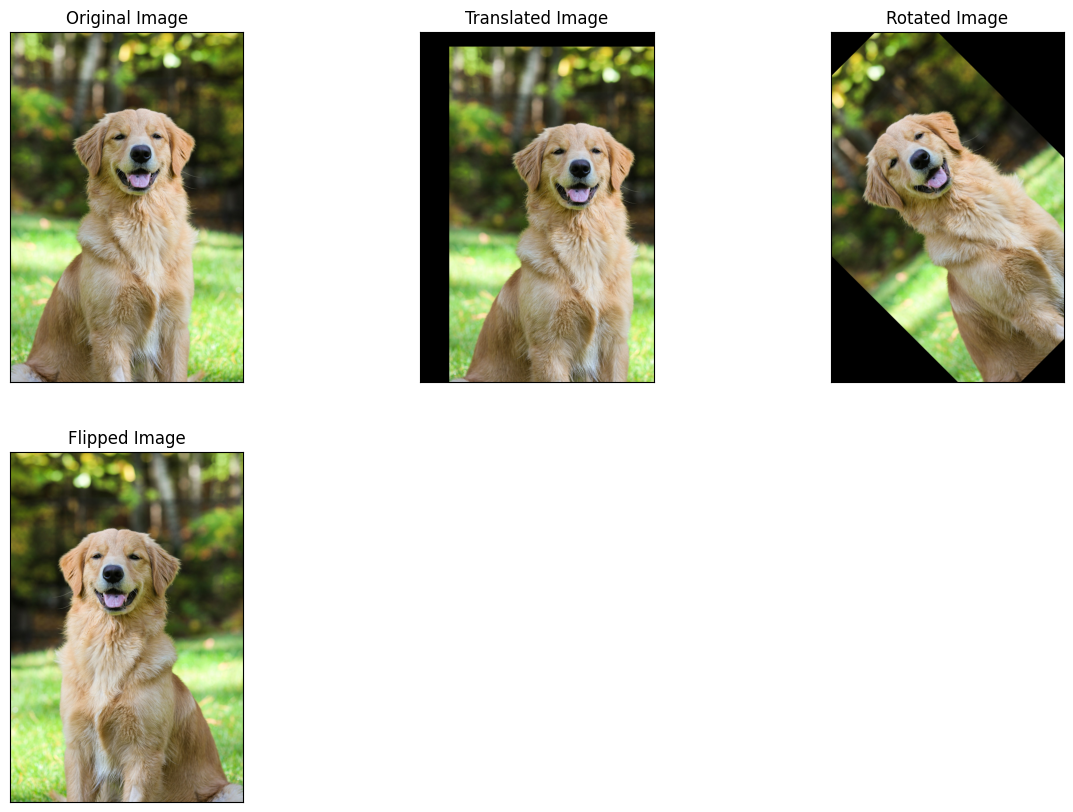

In [18]:
# 图像几何变换
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 图像平移
# 使用cv2.warpAffine函数进行图像平移
# 参数说明：
# - src：输入图像，这里是img_rgb
# - M：变换矩阵，2x3的numpy数组
# - dsize：输出图像的大小，格式为 (width, height)
# 定义平移向量，沿x轴平移100个像素，沿y轴平移50个像素
tx = 100
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
# 获取图像的高度和宽度
height, width = img_rgb.shape[:2]
# 进行平移操作
translated_img = cv2.warpAffine(img_rgb, M, (width, height))

# 图像旋转
# 使用cv2.getRotationMatrix2D函数获取旋转矩阵，再用cv2.warpAffine进行旋转
# 参数说明：
# - center：旋转中心，这里设为图像中心 (width / 2, height / 2)
# - angle：旋转角度，设为45度
# - scale：缩放比例，设为1.0，即不缩放
center = (width / 2, height / 2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img_rgb, rotation_matrix, (width, height))

# 图像翻转
# 使用cv2.flip函数进行图像翻转
# 参数说明：
# - flipCode：翻转模式，0表示沿x轴翻转，1表示沿y轴翻转，-1表示沿x轴和y轴同时翻转
# 这里沿y轴翻转
flipped_img = cv2.flip(img_rgb, 1)

# 显示图像
plt.figure(figsize=(15, 10))

# 显示原图像
plt.subplot(231), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 显示平移后的图像
plt.subplot(232), plt.imshow(translated_img)
plt.title('Translated Image'), plt.xticks([]), plt.yticks([])

# 显示旋转后的图像
plt.subplot(233), plt.imshow(rotated_img)
plt.title('Rotated Image'), plt.xticks([]), plt.yticks([])

# 显示翻转后的图像
plt.subplot(234), plt.imshow(flipped_img)
plt.title('Flipped Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 4. 图像阈值处理
在图像处理中，阈值处理是一项基础且关键的操作，它能够将图像中的像素点根据设定的阈值进行分类，从而实现图像的分割、特征提取等功能。这部分主要涵盖以下内容：

- **全局阈值**：在处理图像时，当我们希望依据一个固定的阈值对整幅图像进行统一处理，就会用到全局阈值方法。这里主要使用 `cv2.threshold` 函数来进行全局阈值分割。
    - **二值化**：设图像为 $I(x,y)$，表示坐标为 $(x,y)$ 的像素点的灰度值，阈值为 $T$。二值化操作可表示为：
$$I_{binary}(x,y) = 
\begin{cases}
255, & I(x,y) \geq T \\
0, & I(x,y) < T
\end{cases}$$  
该操作是将图像像素根据设定的阈值，明确地分为 0 和 255 两个值。比如在一张灰度图像中，像素值小于阈值的被归为 0（通常显示为黑色），大于等于阈值的则被设为 255（通常显示为白色），这样就能突出图像中的某些特征，或者分离前景与背景。
    - **反二值化**：同样设图像为 $I(x,y)$，阈值为 $T$。反二值化操作可表示为：
$$I_{binary - inv}(x,y) = 
\begin{cases}
0, & I(x,y) \geq T \\
255, & I(x,y) < T
\end{cases}$$  
与二值化相反，像素值小于阈值的被设为 255，大于等于阈值的变为 0 。这种操作在一些特定场景下，能以不同的方式呈现图像的信息。
    - **函数参数详解**：
        - **thresh（阈值）**：这是一个关键参数，它是像素值分类的依据。当像素值与这个值进行比较后，根据所选的阈值类型来决定最终的像素取值。
        - **maxval（最大值）**：在某些阈值类型（如 `cv2.THRESH_BINARY` ）中，当像素值满足特定条件时，会被赋予这个 `maxval` 值，一般设为 255 来表示白色。
        - **type（阈值类型）**：常见的如 `cv2.THRESH_BINARY` ，它按照阈值将像素分为 0 和 `maxval` 两个值，其数学表达式如上述二值化公式；`cv2.THRESH_BINARY_INV` 则是反向的二值化操作，其数学表达式如上述反二值化公式。不同的阈值类型会产生截然不同的图像效果，需根据实际需求灵活选择。

 - **自适应阈值**：在实际场景中，很多图像存在光照不均匀的情况，此时固定的全局阈值无法取得理想的处理效果。`cv2.adaptiveThreshold` 函数应运而生，它能够根据图像局部区域的特性自适应地计算阈值。
    - **适用场景**：比如拍摄的文档图片，可能存在部分区域过亮或过暗，使用自适应阈值就能更好地处理这类图像，使文字等内容更清晰地被提取出来。
    - **函数参数作用**：
        - **blockSize（邻域大小）**：该参数定义了用于计算局部阈值的邻域范围，即一个正方形区域的边长。设该邻域为 $S(x,y)$，表示以坐标 $(x,y)$ 为中心，边长为 `blockSize` 的正方形区域。这个区域大小的选择很重要，过大可能导致局部特征被过度平滑，过小则可能无法准确反映局部的光照和像素分布情况。
        - **C（从均值或高斯加权均值中减去的常数 ）**：
            - 若使用均值自适应阈值（`cv2.ADAPTIVE_THRESH_MEAN_C`），设邻域 $S(x,y)$ 内的像素值为 $I(m,n)$，$(m,n) \in S(x,y)$，则局部阈值 $T_{local}$ 为：
$$T_{local} = \frac{1}{|S(x,y)|} \sum_{(m,n) \in S(x,y)} I(m,n) - C$$  
其中 $|S(x,y)|$ 表示邻域 $S(x,y)$ 内的像素个数。
            - 若使用高斯加权自适应阈值（`cv2.ADAPTIVE_THRESH_GAUSSIAN_C`），设二维高斯函数为 $G(m - x, n - y, \sigma)$，则局部阈值 $T_{local}$ 为：
$$T_{local} = \frac{\sum_{(m,n) \in S(x,y)} G(m - x, n - y, \sigma) I(m,n)}{\sum_{(m,n) \in S(x,y)} G(m - x, n - y, \sigma)} - C$$  
在计算局部阈值时，会先算出邻域内像素的均值或高斯加权均值，然后减去这个常数 `C` 得到最终的局部阈值。通过调整 `C` 的值，可以控制阈值的大小，进而影响图像的处理效果 。 

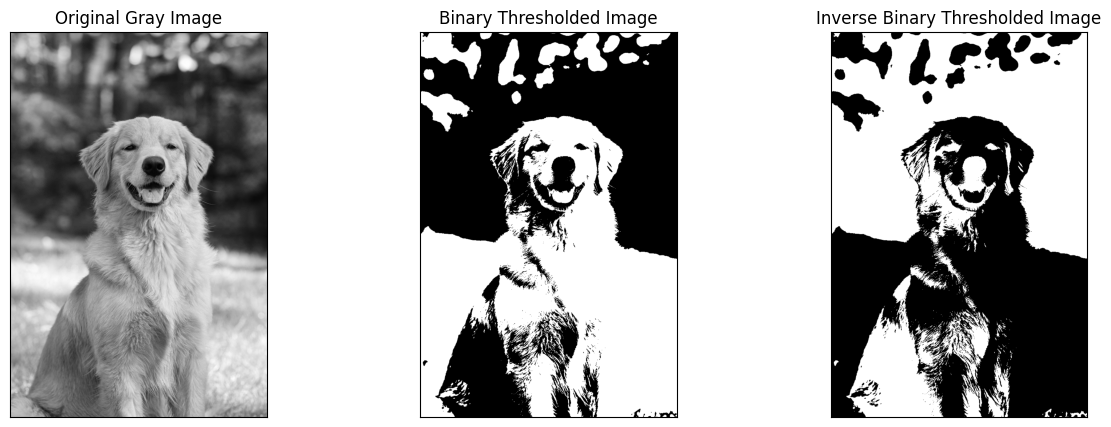

In [19]:
# 全局阈值
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
# 将图像转换为灰度图像，因为阈值处理通常在灰度图像上进行
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
# cv2.threshold 函数用于进行阈值处理，它有以下主要参数：
# - src: 输入的图像，这里是灰度图像 img_gray
# - thresh: 阈值，像素值大于该阈值的将被处理为 maxval，小于的将被处理为 0
# - maxval: 最大值，当像素值满足条件时将被赋予该值
# - type: 阈值类型，这里使用 cv2.THRESH_BINARY 表示二值化
# 返回值 ret 是实际使用的阈值，thresh_binary 是二值化后的图像
ret, thresh_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# 反二值化
# 同样使用 cv2.threshold 函数，只是将阈值类型改为 cv2.THRESH_BINARY_INV 表示反二值化
# 此时像素值大于阈值的将被处理为 0，小于的将被处理为 maxval
ret, thresh_binary_inv = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

# 图像显示
plt.figure(figsize=(15, 5))

# 显示原灰度图像
plt.subplot(131), plt.imshow(img_gray, cmap='gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])

# 显示二值化后的图像
plt.subplot(132), plt.imshow(thresh_binary, cmap='gray')
plt.title('Binary Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出图像被清晰地分为了黑白两部分。灰度值高于阈值的像素变为白色（255），低于阈值的像素变为黑色（0）。
图像中的物体轮廓在二值化后变得更加明显，有助于进行物体的分割和识别。
但如果图像光照不均匀，可能会出现部分区域分割不准确的情况，比如较暗区域的一些本应属于物体的部分可能会被误判为背景。
"""
# 显示反二值化后的图像
plt.subplot(133), plt.imshow(thresh_binary_inv, cmap='gray')
plt.title('Inverse Binary Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出反二值化的结果与二值化相反，灰度值高于阈值的像素变为黑色（0），低于阈值的像素变为白色（255）。
这种处理方式在某些场景下很有用，例如当我们关注的物体在原图像中是较暗的部分时，
反二值化可以让这些物体以白色的形式突出显示，便于后续分析。
"""

plt.show()

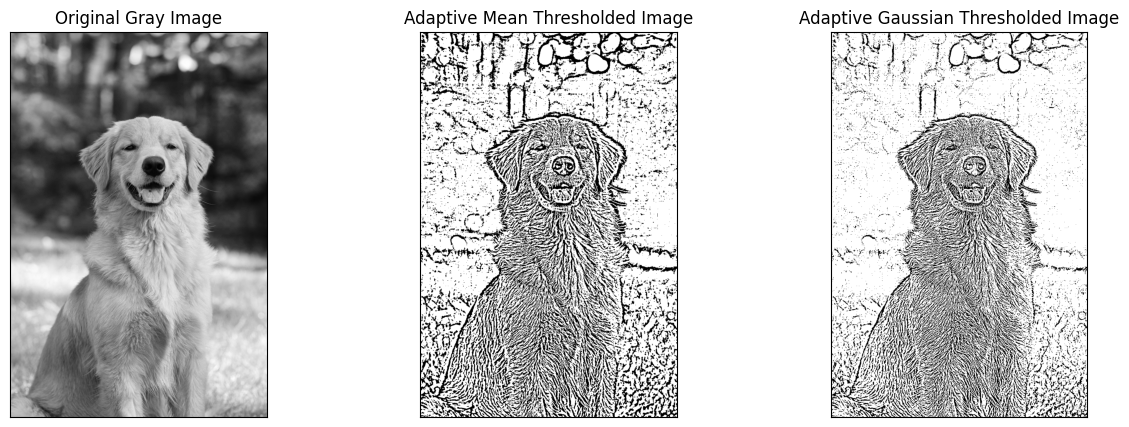

In [20]:
# 自适应阈值
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
# 将图像转换为灰度图像，因为自适应阈值处理通常在灰度图像上进行
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 自适应阈值处理
# cv2.adaptiveThreshold 函数用于进行自适应阈值处理，它有以下主要参数：
# - src: 输入的图像，这里是灰度图像 img_gray
# - maxValue: 最大值，当像素值满足条件时将被赋予该值
# - adaptiveMethod: 自适应方法，有两种选择：
#       - cv2.ADAPTIVE_THRESH_MEAN_C: 邻域内的均值作为阈值
#       - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 邻域内的高斯加权均值作为阈值
# - thresholdType: 阈值类型，通常使用 cv2.THRESH_BINARY
# - blockSize: 邻域大小，用于计算局部阈值的正方形区域的边长，必须是大于 1 的奇数
# - C: 从均值或高斯加权均值中减去的常数
# 这里使用均值自适应方法
adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
# 这里使用高斯加权自适应方法
adaptive_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# 图像显示
plt.figure(figsize=(15, 5))

# 显示原灰度图像
plt.subplot(131), plt.imshow(img_gray, cmap='gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])

# 显示均值自适应阈值处理后的图像
plt.subplot(132), plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出均值自适应阈值处理能够根据图像的局部区域特性来计算阈值。
在光照不均匀的情况下，相比全局阈值处理，它能更好地适应不同区域的亮度变化，使得图像的各个部分都能得到较为合适的分割。
例如，在较亮和较暗的区域都能清晰地显示出物体的轮廓，
减少了因光照差异导致的分割误差。但可能会存在一些局部细节的丢失，因为它是基于邻域均值进行阈值计算的。
"""

# 显示高斯加权自适应阈值处理后的图像
plt.subplot(133), plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
 注：可以看出高斯加权自适应阈值处理结合了高斯加权的思想，对邻域内的像素进行加权平均来计算阈值。
 它在处理光照不均匀图像时比均值自适应阈值更具优势，因为它更注重邻域中心像素的影响，能够更好地保留图像的细节信息。
 图像中的物体轮廓更加清晰，边缘过渡也更加自然，对于复杂光照条件下的图像分割效果较好。
"""

plt.show()

### 5.图像增强
直方图均衡化：通过重新分布图像的灰度值，增强图像的全局对比度，使目标在图像中更清晰地呈现。这对于 YOLO 在光线不均匀或低对比度图像上的检测性能提升有帮助，例如在一些监控场景中，可改善画面质量以利于检测目标。  
自适应直方图均衡化（CLAHE）：相较于普通直方图均衡化，它能在图像的局部区域进行自适应调整，避免在全局调整时可能出现的过度增强或噪声放大问题。在 YOLO 处理包含多个不同光照区域的复杂图像时，CLAHE 有助于更好地保留目标细节，提高检测的准确性。

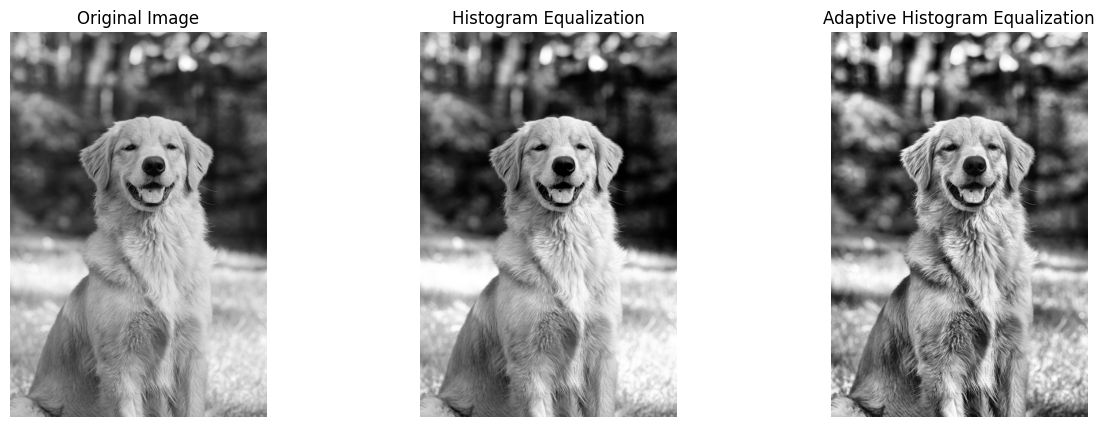

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 直方图均衡化
# cv2.equalizeHist() 用于对灰度图像进行直方图均衡化
# 参数：
# - src：输入的单通道（灰度）图像
# 返回值：
# - dst：直方图均衡化后的图像
equ = cv2.equalizeHist(img_gray)

# 自适应直方图均衡化
# 创建自适应直方图均衡化对象
# cv2.createCLAHE() 用于创建一个自适应直方图均衡化对象
# 参数：
# - clipLimit：对比度限制阈值，默认值为 40.0。用于限制局部直方图的对比度，防止过度增强。
# - tileGridSize：分块网格的大小，默认值为 (8, 8)。将图像分成多个小块，每个小块独立进行直方图均衡化。
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
# 应用自适应直方图均衡化
cl1 = clahe.apply(img_gray)

# 图像显示
plt.figure(figsize=(15, 5))

# 显示原始图像
plt.subplot(131)
plt.imshow(img_gray, cmap=cm.gray)
plt.title('Original Image')
plt.axis('off')

# 显示直方图均衡化后的图像
plt.subplot(132)
plt.imshow(equ, cmap=cm.gray)
plt.title('Histogram Equalization')
plt.axis('off')
"""
注：可以看出，经过直方图均衡化后的图像，整体对比度得到了显著提升。原本较暗或较亮的区域变得更加清晰，灰度值的分布范围更广。
例如，图像中一些原本细节被掩盖在较暗区域的部分，现在能够更清楚地显现出来。
然而，由于直方图均衡化是对整幅图像进行全局操作，可能会导致某些局部区域过度增强，
出现一些噪声被放大或者细节丢失的情况，比如图像中的一些平滑区域可能会出现不自然的纹理变化。
"""

# 显示自适应直方图均衡化后的图像
plt.subplot(133)
plt.imshow(cl1, cmap=cm.gray)
plt.title('Adaptive Histogram Equalization')
plt.axis('off')
"""
注：可以看出，自适应直方图均衡化后的图像在提升对比度方面表现出色，同时相较于全局的直方图均衡化，它更好地保留了图像的细节。
在不同的局部区域，都能根据该区域的特点进行合理的对比度调整。
例如，在图像中较暗的局部区域，它能够在增强亮度的同时，避免噪声的过度放大；
在较亮的区域，也能适当调整对比度，使细节更加丰富。
而且，自适应直方图均衡化对于图像中不同的纹理和边缘信息，能够更好地进行保护和增强，使得图像看起来更加自然和真实，视觉效果更佳。
"""

plt.show()

### 6.图像金字塔
高斯金字塔：通过对图像进行多次高斯模糊和下采样操作，生成不同尺度的图像。在 YOLO 中，利用高斯金字塔可以在多个尺度上对图像进行特征提取，有助于检测不同大小的目标。例如，小目标可能在高分辨率的上层金字塔图像中更容易被检测到，而大目标则可以在低分辨率的下层金字塔图像中被有效识别。
拉普拉斯金字塔：由高斯金字塔相邻两层图像相减得到，它保留了图像在不同尺度下的高频细节信息。在 YOLO 的特征融合过程中，拉普拉斯金字塔的信息可以补充丢失的细节，提升模型对目标边缘和纹理的感知能力，从而提高检测精度。

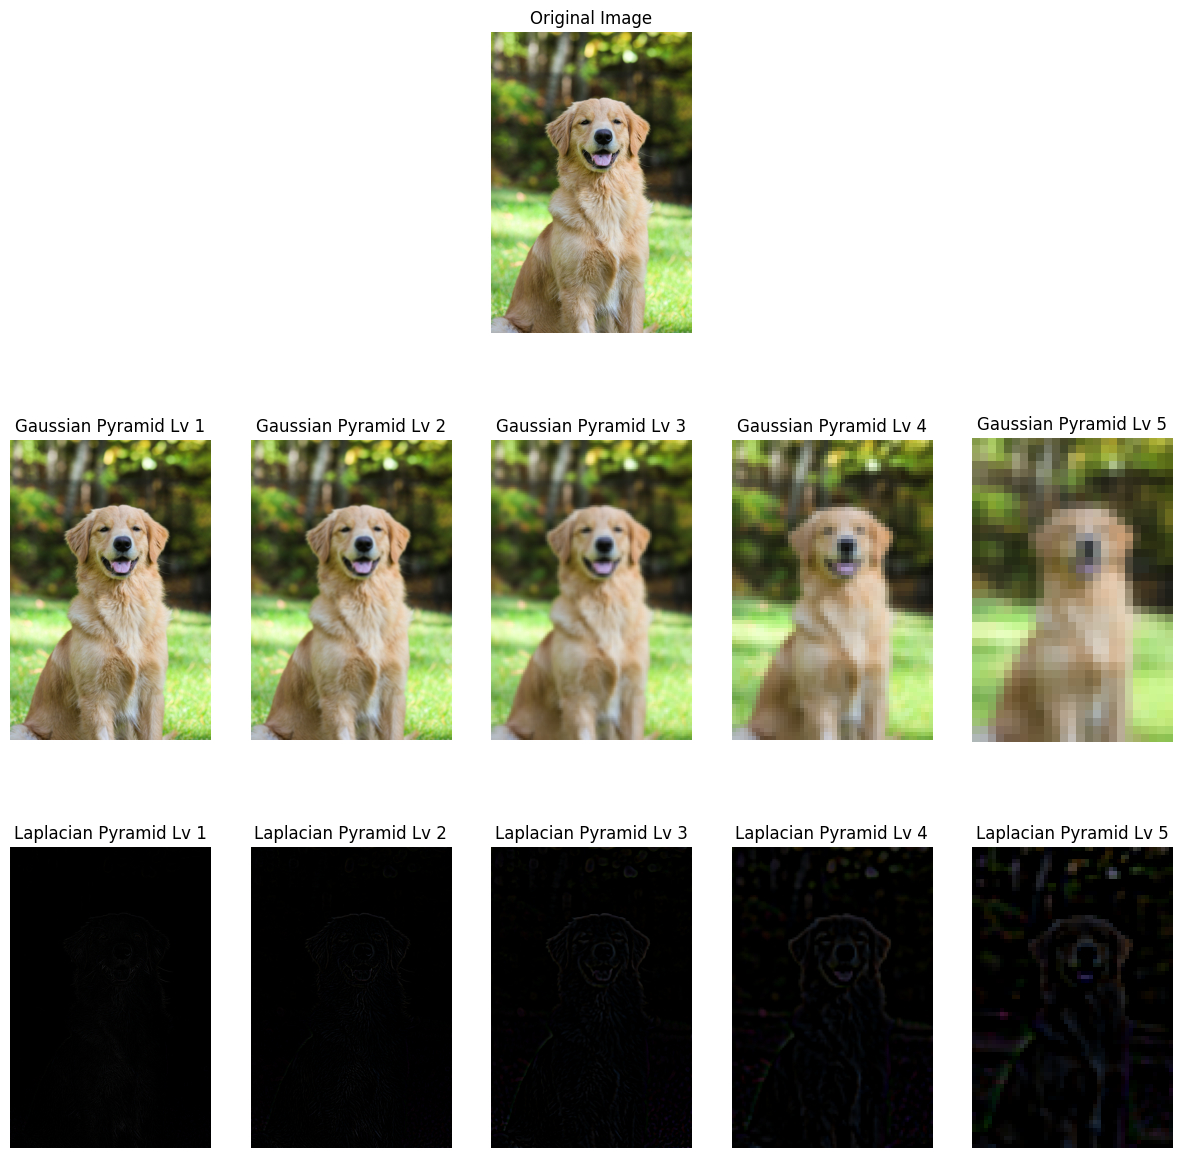

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 高斯金字塔
# 高斯金字塔是通过对图像进行多次高斯模糊和下采样得到的
# cv2.pyrDown() 函数用于对图像进行下采样，构建高斯金字塔的下一层
# 参数：
# - src：输入图像
# - dstsize：输出图像的大小（可选参数），如果不指定，则根据默认规则计算得到下采样后的大小
# 返回值：
# - dst：下采样后的图像
# 这里构建 3 层高斯金字塔
G = img_rgb.copy()
gp = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gp.append(G)

# 拉普拉斯金字塔
# 拉普拉斯金字塔是由高斯金字塔相邻两层图像相减得到的，用于保留图像在不同尺度下的高频细节信息
# 构建拉普拉斯金字塔
lp = [gp[len(gp) - 1]]
for i in range(len(gp) - 1, 0, -1):
    GE = cv2.pyrUp(gp[i])
    GE = cv2.resize(GE, (gp[i - 1].shape[1], gp[i - 1].shape[0]))
    L = cv2.subtract(gp[i - 1], GE)
    lp.append(L)

# 图像显示
plt.figure(figsize=(15, 15))

# 显示原始图像
plt.subplot(3, 5, 3)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 显示高斯金字塔的图像
for i in range(1, len(gp)):
    plt.subplot(3, 5, i + 5)
    plt.imshow(gp[i])
    plt.title(f'Gaussian Pyramid Lv {i}')
    plt.axis('off')
"""
注：可以看出，随着高斯金字塔层数的增加，图像的尺寸逐渐变小。
这是因为每一层都是通过对上一层图像进行高斯模糊和下采样得到的。
在这个过程中，图像的高频信息被逐渐过滤掉，使得图像变得更加平滑、模糊。
较低层的图像保留了较多的细节信息，而较高层的图像则更侧重于表现图像的整体轮廓和大致结构。
例如，在底层图像中可以清晰地看到图像中的小物体和细节特征，
但随着层数的增加，这些细节逐渐消失，只能看到物体的大致形状。
"""

# 显示拉普拉斯金字塔的图像
start_index = len(gp) + 1  # 从高斯金字塔子图之后开始编号
for i in range(len(lp) - 1, 0, -1):
    index = start_index + (len(lp) + 3 - i)
    plt.subplot(3, 5, index)
    plt.imshow(lp[i])
    plt.title(f'Laplacian Pyramid Lv {len(lp) - i}')
    plt.axis('off')
"""
注：可以看出，拉普拉斯金字塔的图像主要显示了图像在不同尺度下的高频细节信息。
每一层拉普拉斯金字塔图像是通过将高斯金字塔相邻两层图像相减得到的，
因此它保留了相邻两层之间的差异，也就是图像中的高频部分，如边缘、纹理等。
较低层的拉普拉斯金字塔图像包含了较多的细节和边缘信息，这些信息对应着图像中的小尺度特征。
而较高层的拉普拉斯金字塔图像则显示了更大尺度的边缘和结构信息。
通过观察拉普拉斯金字塔图像，可以更好地理解图像在不同尺度下的特征分布，
并且在一些图像处理任务中，如图像融合、特征提取等，拉普拉斯金字塔可以提供重要的信息。
"""

plt.show()
    

### 7.图像形态学操作
腐蚀和膨胀：用于处理目标的二值化掩膜（例如在对 YOLO 检测结果进行后处理时）。腐蚀可以去除目标边缘的小毛刺和孤立噪声点，使目标形状更加规则；膨胀则可以填充目标内部的小空洞，连接相邻的目标区域，有助于更准确地统计目标数量和计算目标的面积等属性。  
开运算和闭运算：开运算（先腐蚀后膨胀）可以去除图像中的小噪声块，使目标轮廓更加平滑；闭运算（先膨胀后腐蚀）能够连接相邻的目标，填充目标内的细小空洞。在 YOLO 的检测结果后处理中，这些操作可以优化目标的分割和定位，提高检测的质量。

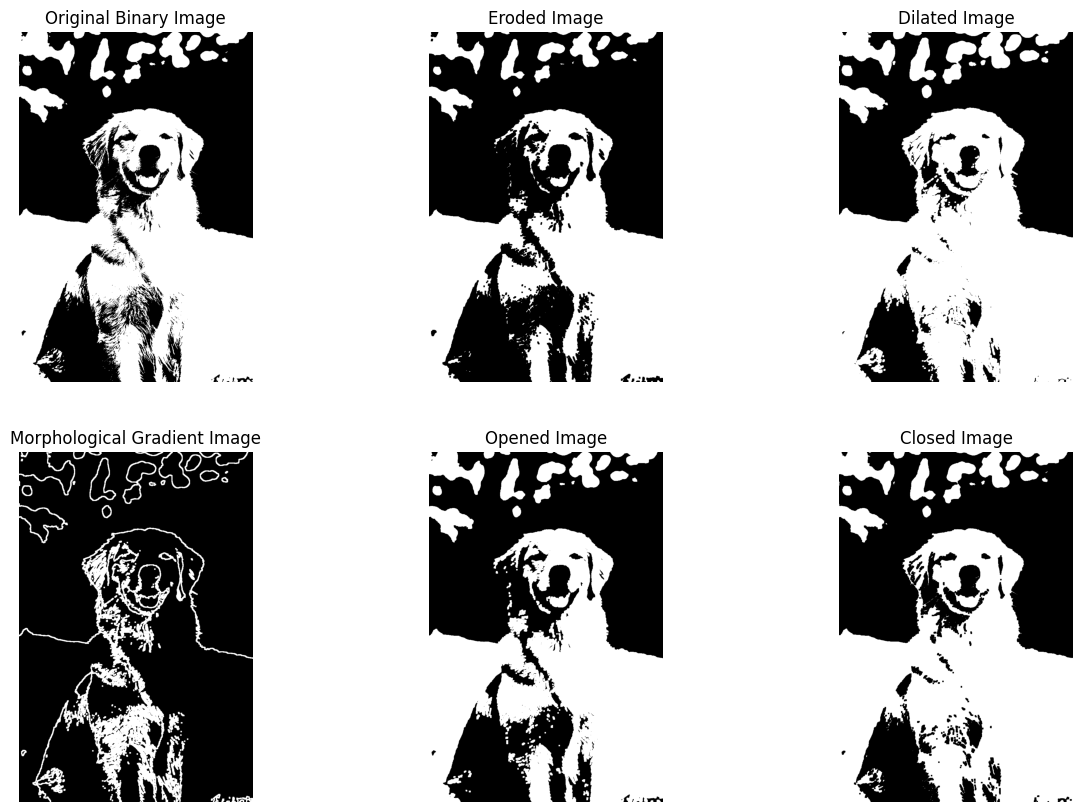

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将图像转换为灰度图，形态学操作通常在灰度图上进行
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# 使用阈值化将灰度图转换为二值图，方便形态学操作
_, img_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)

# 图像腐蚀
# cv2.erode() 函数用于图像腐蚀操作
# 参数：
# - src：输入图像，这里是二值图像 img_binary
# - kernel：腐蚀操作的核，是一个 numpy 数组，决定了腐蚀的形状和大小，常用的有矩形、椭圆等
# - iterations：腐蚀操作的迭代次数，默认为 1，迭代次数越多，腐蚀效果越明显
# 返回值：
# - dst：腐蚀后的图像
eroded = cv2.erode(img_binary, kernel, iterations=1)

# 图像膨胀
# cv2.dilate() 函数用于图像膨胀操作
# 参数：
# - src：输入图像，即前面得到的腐蚀后的图像 eroded 或者原始二值图像 img_binary
# - kernel：膨胀操作的核，和腐蚀操作的核类似
# - iterations：膨胀操作的迭代次数，默认为 1，迭代次数越多，膨胀效果越明显
# 返回值：
# - dst：膨胀后的图像
dilated = cv2.dilate(img_binary, kernel, iterations=1)

# 图像开运算
# cv2.morphologyEx() 函数用于形态学高级操作，这里进行开运算
# 参数：
# - src：输入图像，这里使用原始二值图像 img_binary
# - op：操作类型，cv2.MORPH_OPEN 表示开运算，开运算先腐蚀后膨胀
# - kernel：操作的核
# 返回值：
# - dst：开运算后的图像
opened = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel)

# 图像闭运算
# cv2.morphologyEx() 函数，操作类型设为 cv2.MORPH_CLOSE 表示闭运算，闭运算先膨胀后腐蚀
# 参数与开运算类似
# 返回值：
# - dst：闭运算后的图像
closed = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)

# 图像形态学梯度
# 形态学梯度是膨胀图像与腐蚀图像的差值，使用 cv2.morphologyEx() 函数，操作类型设为 cv2.MORPH_GRADIENT
# 参数：
# - src：输入图像，这里使用原始二值图像 img_binary
# - op：操作类型，cv2.MORPH_GRADIENT 表示形态学梯度
# - kernel：操作的核
# 返回值：
# - dst：形态学梯度后的图像
gradient = cv2.morphologyEx(img_binary, cv2.MORPH_GRADIENT, kernel)

# 图像输出
plt.figure(figsize=(15, 10))

# 显示原始图像
plt.subplot(2, 3, 1)
plt.imshow(img_binary, cmap=cm.gray)
plt.title('Original Binary Image')
plt.axis('off')

# 显示图像腐蚀后的图像
plt.subplot(2, 3, 2)
plt.imshow(eroded, cmap=cm.gray)
plt.title('Eroded Image')
plt.axis('off')
"""
注：可以看出，经过腐蚀操作后，图像中的前景物体尺寸变小。原本物体边缘的小凸起、小毛刺以及孤立的小亮点都被去除了。
这是因为腐蚀操作会以设定的核为模板，只有当核完全覆盖前景像素时，该像素才会被保留为前景，否则就会被腐蚀成背景。
所以在视觉上，物体看起来更加“纤细”，一些细小的连接部分可能会断开。
例如，如果图像中有一个带有毛刺的圆形物体，腐蚀后圆形的半径会变小，毛刺也会消失。
"""
# 显示图像膨胀后的图像
plt.subplot(2, 3, 3)
plt.imshow(dilated, cmap=cm.gray)
plt.title('Dilated Image')
plt.axis('off')
"""
注：可以看出，膨胀操作使得图像中的前景物体尺寸增大。
原本物体内部的小空洞被填充，相邻的物体可能会连接在一起。
这是因为膨胀操作只要核覆盖到任何一个前景像素，就会将核中心位置的像素置为前景。
所以在视觉上，物体看起来更加“粗壮”，一些原本分离的小物体可能会合并成一个大物体。
例如，如果图像中有两个距离较近的圆形物体，膨胀后它们可能会连接成一个整体。
"""
# 显示图像开运算后的图像
plt.subplot(2, 3, 5)
plt.imshow(opened, cmap=cm.gray)
plt.title('Opened Image')
plt.axis('off')
"""
注：可以看出，开运算先进行腐蚀操作去除小的噪声和细小的连接部分，然后再进行膨胀操作恢复物体的大致形状。
整体上，图像中的小噪声点和孤立的小物体被有效去除，同时物体的主体形状基本保持不变。
物体的边缘变得更加平滑，原本一些不规则的边缘被修正。
例如，如果图像中有一些随机分布的小亮点噪声和一个不规则形状的物体，开运算后小亮点会消失，物体的形状会更加规整。
"""
# 显示图像闭运算后的图像
plt.subplot(2, 3, 6)
plt.imshow(closed, cmap=cm.gray)
plt.title('Closed Image')
plt.axis('off')
"""
注：可以看出...
"""
# 显示图像形态学梯度后的图像
plt.subplot(2, 3, 4)
plt.imshow(gradient, cmap=cm.gray)
plt.title('Morphological Gradient Image')
plt.axis('off')
"""
注：可以看出，形态学梯度图像突出显示了图像中物体的边缘。
它是通过膨胀图像减去腐蚀图像得到的，膨胀操作使物体边缘向外扩展，腐蚀操作使物体边缘向内收缩，两者相减后就得到了物体的边缘信息。
在图像中，物体的边缘部分显示为白色，而物体内部和背景部分显示为黑色。
这有助于检测物体的边界，在一些边缘检测和物体轮廓提取的任务中非常有用。
例如，如果图像中有一个矩形物体，形态学梯度图像会清晰地显示出矩形的四条边。
"""

plt.show()

### 8.边缘检测
Canny 边缘检测：生成的边缘图像可以作为额外的特征输入到 YOLO 模型中，辅助模型更好地识别目标的边界。例如，在一些形状特征明显的目标检测任务中，Canny 边缘信息可以增强模型对目标形状的理解，从而提高检测性能。  
轮廓提取：基于边缘检测结果，进一步提取目标的轮廓。在 YOLO 中，轮廓信息可以用于目标的形状描述和分类，例如区分圆形、矩形等不同形状的目标，或者结合其他特征来提高目标的识别准确率。

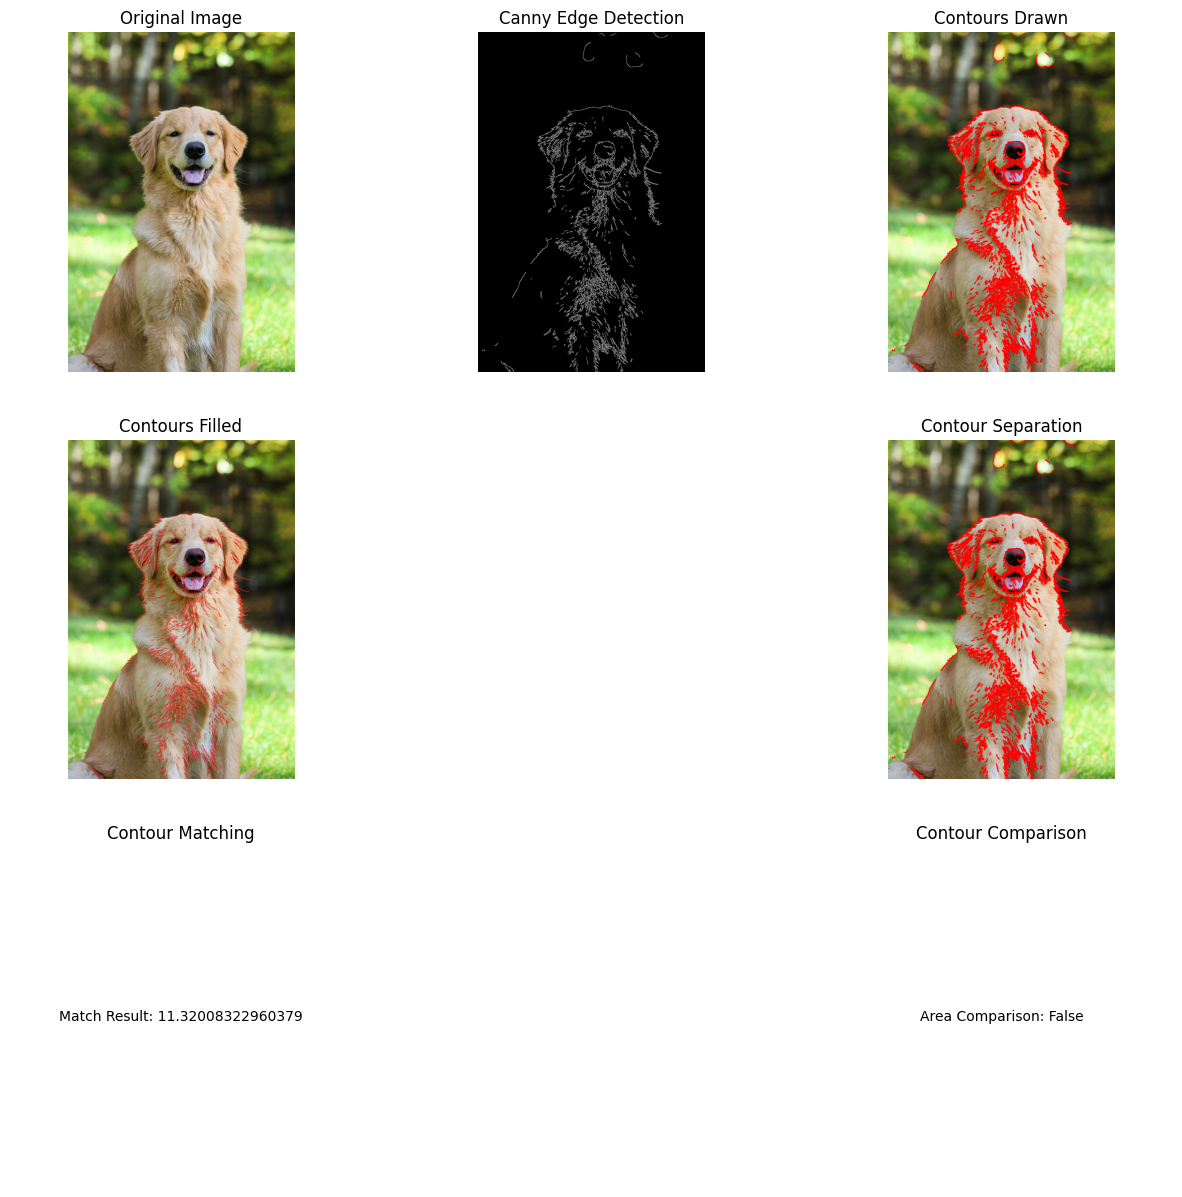

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Canny 边缘检测
# cv2.Canny() 函数用于进行 Canny 边缘检测
# 参数：
# - image: 输入的单通道图像，这里使用灰度图像 img_gray
# - threshold1: 第一个阈值，用于滞后阈值处理的低阈值
# - threshold2: 第二个阈值，用于滞后阈值处理的高阈值
# - apertureSize: Sobel 算子的孔径大小，默认为 3
# - L2gradient: 一个布尔值，指定是否使用更精确的 L2 范数来计算梯度幅值，默认为 False
# 返回值：
# - edges: 检测到的边缘图像
edges = cv2.Canny(img_gray, 100, 200)

# 轮廓提取
# cv2.findContours() 函数用于在二值图像中查找轮廓
# 参数：
# - image: 输入的二值图像，这里使用 Canny 边缘检测后的图像 edges
# - mode: 轮廓检索模式，例如 cv2.RETR_TREE 表示检索所有轮廓并重建嵌套轮廓的完整层次结构
# - method: 轮廓近似方法，例如 cv2.CHAIN_APPROX_SIMPLE 表示只保留轮廓的端点
# 返回值：
# - contours: 检测到的轮廓列表，每个轮廓是一个包含点坐标的 numpy 数组
# - hierarchy: 轮廓的层次结构信息
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 轮廓绘制
# cv2.drawContours() 函数用于在图像上绘制轮廓
# 参数：
# - image: 要绘制轮廓的图像，这里使用 img_rgb 的副本
# - contours: 要绘制的轮廓列表
# - contourIdx: 要绘制的轮廓索引，-1 表示绘制所有轮廓
# - color: 轮廓的颜色，这里使用红色 (255, 0, 0)
# - thickness: 轮廓线的厚度，这里设置为 2
# 返回值：
# - image: 绘制了轮廓的图像
img_contours = img_rgb.copy()
cv2.drawContours(img_contours, contours, -1, (255, 0, 0), 2)

# 轮廓填充
# 可以通过修改 cv2.drawContours() 的 thickness 参数为 -1 来实现轮廓填充
# 参数与轮廓绘制类似
img_filled = img_rgb.copy()
cv2.drawContours(img_filled, contours, -1, (255, 0, 0), -1)

# 轮廓分析
# 以计算轮廓的面积为例
# cv2.contourArea() 函数用于计算轮廓的面积
# 参数：
# - contour: 要计算面积的轮廓
# 返回值：
# - area: 轮廓的面积
areas = [cv2.contourArea(c) for c in contours]

# 轮廓匹配
# cv2.matchShapes() 函数用于比较两个轮廓的相似度
# 参数：
# - contour1: 第一个轮廓
# - contour2: 第二个轮廓
# - method: 匹配方法，例如 cv2.CONTOURS_MATCH_I1
# - parameter: 方法的特定参数，通常为 0
# 返回值：
# - result: 匹配结果，值越小表示越相似
if len(contours) >= 2:
    match_result = cv2.matchShapes(contours[0], contours[1], cv2.CONTOURS_MATCH_I1, 0)
else:
    match_result = None

# 轮廓比较
# 可以通过比较轮廓的面积、周长等属性来进行比较
# 以比较面积为例
if len(areas) >= 2:
    area_comparison = areas[0] > areas[1]
else:
    area_comparison = None

# 轮廓分割
# 这里简单示例为按轮廓的层次结构分割出不同层次的轮廓
if hierarchy is not None:
    top_level_contours = [contours[i] for i in range(len(contours)) if hierarchy[0][i][3] == -1]
else:
    top_level_contours = []

# 图像输出
plt.figure(figsize=(15, 15))

# 显示原始图像
plt.subplot(3, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 显示 Canny 边缘检测结果
plt.subplot(3, 3, 2)
plt.imshow(edges, cmap=cm.gray)
plt.title('Canny Edge Detection')
plt.axis('off')
"""
注：可以看出，经过 Canny 边缘检测后，图像中物体的边缘被清晰地勾勒出来。
较亮的线条表示检测到的边缘，而较暗的区域则是背景。
Canny 算法通过高斯滤波去噪、计算梯度、非极大值抑制和滞后阈值处理等步骤，
有效地提取了图像中灰度变化较大的区域，即边缘部分。
对于这张图像，能够看到狗的轮廓以及周围环境中一些物体的边缘，
这些边缘信息对于后续的物体识别、轮廓提取等操作提供了基础。
同时，由于设置了合适的高低阈值（这里是 100 和 200），
较好地避免了过多的噪声边缘干扰，使得检测结果相对准确和清晰。
"""

# 显示轮廓绘制结果
plt.subplot(3, 3, 3)
plt.imshow(img_contours)
plt.title('Contours Drawn')
plt.axis('off')
"""
注：可以看出，轮廓绘制结果在原始彩色图像上叠加了检测到的轮廓。
这些轮廓以红色线条（根据代码设置）显示，清晰地勾勒出了图像中各个物体的边界。
通过轮廓绘制，可以直观地看到 Canny 边缘检测所提取的边缘被组织成了一个个连续的轮廓，
这些轮廓能够准确地描述物体的形状。
例如，狗的身体、四肢、头部等部分的轮廓都被清晰地呈现出来，
有助于进一步对物体的形状特征进行分析和处理。
同时，也可以看到一些较小的物体或细节部分的轮廓也被绘制出来，反映了轮廓提取的完整性。
"""

# 显示轮廓填充结果
plt.subplot(3, 3, 4)
plt.imshow(img_filled)
plt.title('Contours Filled')
plt.axis('off')
"""
注：可以看出，轮廓填充结果将检测到的轮廓内部区域填充为红色（根据代码设置）。
这种填充操作使得物体的形状更加直观和完整，能够更清晰地展示物体的范围和形态。
与轮廓绘制结果相比，填充后的图像更强调物体的区域特性，
对于一些需要分析物体内部特征或进行区域分割的任务很有帮助。
例如，通过观察填充后的狗的轮廓，可以更方便地计算其面积、分析其内部的颜色分布等。
同时，也能更明显地看出不同物体之间的相对位置和边界关系。
"""

# 显示轮廓分割结果
plt.subplot(3, 3, 6)
if len(top_level_contours) > 0:
    img_separated = img_rgb.copy()
    cv2.drawContours(img_separated, top_level_contours, -1, (255, 0, 0), 2)
    plt.imshow(img_separated)
else:
    plt.text(0.5, 0.5, 'No top-level contours', ha='center', va='center')
plt.title('Contour Separation')
plt.axis('off')
"""
注：可以看出，轮廓分割结果展示了根据轮廓的层次结构分割出的顶级轮廓（top_level_contours）。
如果存在顶级轮廓，则会在原始图像的副本上绘制这些轮廓。
顶级轮廓通常是指那些没有被其他轮廓包含的最外层轮廓，通过这种分割操作，
可以将图像中的不同物体或区域进行分离，便于对每个独立的物体进行进一步的分析和处理。
例如，在复杂的图像中，可能存在多个相互嵌套的物体轮廓，通过轮廓分割可以清晰地将它们区分开来。
如果没有顶级轮廓，则会显示相应的提示信息，说明图像中不存在符合条件的轮廓。
"""

# 显示轮廓面积结果
plt.subplot(3, 3, 7)
if match_result is not None:
    plt.text(0.5, 0.5, f'Match Result: {match_result}', ha='center', va='center')
else:
    plt.text(0.5, 0.5, 'Not enough contours for matching', ha='center', va='center')
plt.title('Contour Matching')
plt.axis('off')
"""
注：可以看出，轮廓匹配结果展示了两个轮廓之间的相似度度量值（match_result）。
如果有足够的轮廓进行匹配（这里至少需要两个轮廓），则会显示出具体的匹配结果数值，
该数值越小，表示两个轮廓越相似。通过这个结果，可以判断不同物体的轮廓是否具有相似的形状特征，
对于物体分类、识别等任务有重要的参考价值。
例如，在一些目标检测应用中，可以通过轮廓匹配来判断检测到的物体是否与已知的目标物体形状相似。
如果没有足够的轮廓进行匹配，则会显示相应的提示信息，说明无法进行有效的匹配操作。
"""

# 显示轮廓比较结果
plt.subplot(3, 3, 9)
if area_comparison is not None:
    plt.text(0.5, 0.5, f'Area Comparison: {area_comparison}', ha='center', va='center')
else:
    plt.text(0.5, 0.5, 'Not enough contours for comparison', ha='center', va='center')
plt.title('Contour Comparison')
plt.axis('off')
"""
注：可以看出，轮廓比较结果展示了对轮廓面积的比较情况。
如果有足够的轮廓（至少两个）进行面积比较，则会显示出比较的结果（area_comparison），
即一个布尔值，表示第一个轮廓的面积是否大于第二个轮廓的面积。
通过这种比较，可以了解不同物体轮廓所占据的区域大小关系，对于一些需要根据物体大小进行判断或筛选的任务很有帮助。
例如，在图像中区分大物体和小物体，或者根据物体面积进行排序等操作。
如果没有足够的轮廓进行比较，则会显示提示信息，表明无法进行有效的面积比较。
"""

plt.show()

### 9.特征点检测与匹配
SIFT（尺度不变特征变换）、SURF（加速稳健特征） 等算法可以提取图像中的局部特征点，并生成具有独特描述的特征向量。在 YOLO 进行目标跟踪或图像拼接等扩展应用中，特征点匹配可以帮助确定不同图像之间的对应关系，实现目标在连续帧中的跟踪或者将多个图像拼接成全景图像。  
ORB（Oriented FAST and Rotated BRIEF） 是一种计算效率较高的特征点检测和描述算法，适合在实时性要求较高的 YOLO 应用场景中使用，如移动设备上的目标检测任务，它可以快速提取特征点并进行匹配，辅助目标的定位和识别。

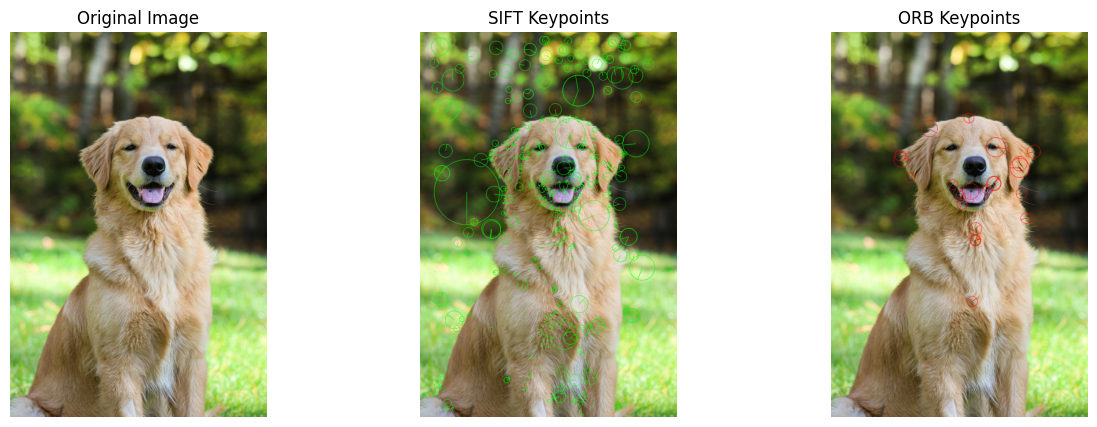

In [25]:
# 特征点检测与匹配
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# SIFT 特征点检测与匹配
# 方法及参数介绍
sift = cv2.SIFT_create(contrastThreshold=0.06, edgeThreshold=15) 
keypoints_sift, descriptors_sift = sift.detectAndCompute(img_gray, None)
sift_color = (0, 255, 0, 128)
img_sift = cv2.drawKeypoints(img_rgb, keypoints_sift, None, color=sift_color, 
                             flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# ORB 特征点检测与匹配
# 方法及参数介绍
orb = cv2.ORB_create(nfeatures=120, scaleFactor=1.1, edgeThreshold=60, 
                     fastThreshold=45, scoreType=cv2.ORB_FAST_SCORE, WTA_K=3)
keypoints_orb, descriptors_orb = orb.detectAndCompute(img_gray, None)

# ORB 特征点非极大值抑制（基于距离）
# 计算特征点之间的距离矩阵
dist_matrix = np.zeros((len(keypoints_orb), len(keypoints_orb)))
for i in range(len(keypoints_orb)):
    for j in range(len(keypoints_orb)):
        x1, y1 = keypoints_orb[i].pt
        x2, y2 = keypoints_orb[j].pt
        dist_matrix[i, j] = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

keep_indices = []
for i in range(len(keypoints_orb)):
    is_max = True
    for j in range(len(keypoints_orb)):
        if dist_matrix[i, j] < 10 and i != j:  # 距离小于 10 认为是聚集点
            if keypoints_orb[i].response < keypoints_orb[j].response:
                is_max = False
                break
    if is_max:
        keep_indices.append(i)

filtered_keypoints_orb = [keypoints_orb[i] for i in keep_indices]
orb_color = (255, 0, 0)
img_orb = cv2.drawKeypoints(img_rgb, filtered_keypoints_orb, None, color=orb_color, 
                            flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

# 图像输出
plt.figure(figsize=(15, 5))

# 显示原始图像
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# 显示SIFT特征点图像
plt.subplot(1, 3, 2)
plt.imshow(img_sift)
plt.title('SIFT Keypoints')
plt.axis('off')
"""
注：可以看出，SIFT 算法检测到的特征点分布相对较为分散，且在图像中纹理和细节丰富的区域，
如狗的面部、毛发边缘等位置，特征点的数量较多。
这是因为 SIFT 算法对图像的尺度、旋转和光照变化具有不变性，能够有效地捕捉到图像中具有独特特征的位置。
特征点以绿色圆圈标识，圆圈的大小反映了特征点的尺度信息，较大的圆圈表示该特征点在更大的尺度空间上被检测到，
同时也在一定程度上反映了特征点的响应强度，较大的圆圈对应的特征点响应可能更强，意味着该位置的特征更为显著。
通过这些特征点，可以为后续的图像匹配、目标识别等任务提供丰富的信息。
"""

# 显示ORB特征点图像
plt.subplot(1, 3, 3)
plt.imshow(img_orb)
plt.title('ORB Keypoints')
plt.axis('off')
"""
注：可以看出，ORB 算法检测到的特征点主要集中在狗的面部区域，尤其是眼睛、鼻子和嘴巴周围。
这是因为 ORB 算法结合了 FAST 角点检测和 BRIEF 描述子，对图像中的角点等特征较为敏感，而狗面部的这些部位具有明显的角点特征（我参数没调好）。
特征点以红色圆圈标识，从分布上看，相较于 SIFT 特征点，ORB 特征点在局部区域更为聚集。
ORB 算法计算效率较高，适用于对实时性要求较高的场景，这些检测到的特征点可以用于快速的图像匹配和定位任务，例如在图像拼接、目标跟踪等应用中发挥作用。
"""

plt.show()
    

### 10.图像归一化
灰度归一化：将图像的灰度值范围调整到固定区间（如 [0, 1] 或 [0, 255]），使不同图像的灰度分布具有一致性。这有助于 YOLO 模型在训练和推理过程中更稳定地学习和处理图像，提高模型的泛化能力。  
标准化（Normalization）：对图像的每个通道进行归一化处理，使其均值为 0，标准差为 1。在 YOLO 模型训练中，标准化可以加速模型的收敛速度，提高模型的性能和稳定性。

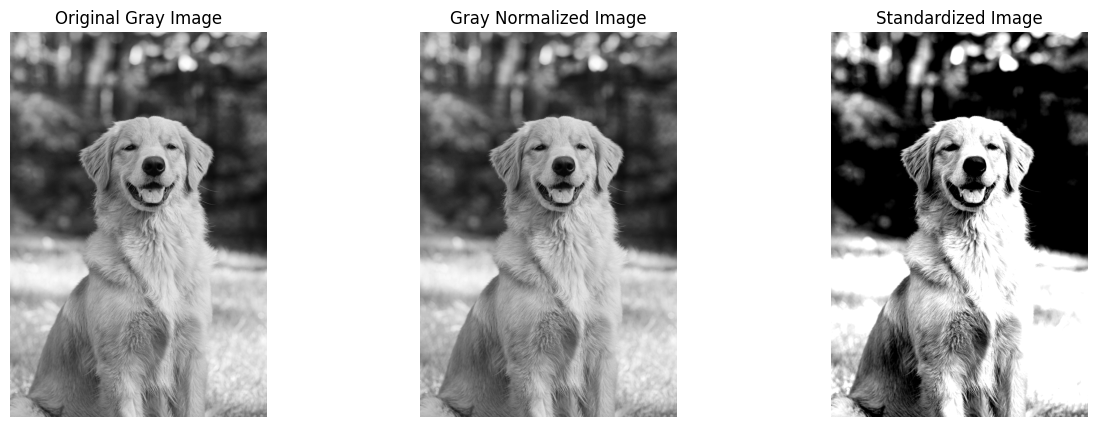

In [26]:
# 图像标准化
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 灰度归一化
# 先将图像转换为灰度图
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# 计算图像的最小和最大像素值
min_val = np.min(img_gray)
max_val = np.max(img_gray)
# 进行灰度归一化
img_gray_norm = (img_gray - min_val) / (max_val - min_val) * 255
img_gray_norm = img_gray_norm.astype(np.uint8)

# 标准化
# 计算图像的均值和标准差
mean = np.mean(img_gray)
std = np.std(img_gray)
# 进行标准化
img_gray_std = (img_gray - mean) / std
# 由于标准化后的像素值可能不在 [0, 255] 范围内，需要进行裁剪和类型转换
img_gray_std = np.clip(img_gray_std, -1, 1)
img_gray_std = ((img_gray_std + 1) / 2 * 255).astype(np.uint8)

# 图像输出
plt.figure(figsize=(15, 5))

# 显示原始灰度图像
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap=cm.gray)
plt.title('Original Gray Image')
plt.axis('off')

# 显示灰度归一化后的图像
plt.subplot(1, 3, 2)
plt.imshow(img_gray_norm, cmap=cm.gray)
plt.title('Gray Normalized Image')
plt.axis('off')
"""
注：可以看出，灰度归一化后的图像相较于原始灰度图像，对比度得到了增强。
图像中原本较暗和较亮的区域之间的差异更加明显，细节部分也变得更加清晰。
例如，狗的毛发纹理、面部表情等细节在归一化后能够更清楚地被观察到。
这是因为灰度归一化通过将像素值线性映射到指定范围，拉伸了图像的灰度分布，使得图像的动态范围增大，
从而提升了视觉上的清晰度和可读性，有助于后续基于图像的特征提取、目标识别等任务。 
"""

# 显示标准化后的图像
plt.subplot(1, 3, 3)
plt.imshow(img_gray_std, cmap=cm.gray)
plt.title('Standardized Image')
plt.axis('off')
"""
注：可以看出，标准化后的图像呈现出与原始灰度图像和灰度归一化图像不同的视觉效果。
标准化操作使得图像的像素值均值为0，标准差为1，这导致图像整体的亮度和对比度发生了改变。
图像中较暗的区域变得更暗，较亮的区域变得更亮，形成了一种类似高对比度的视觉效果。
这种效果使得图像中的边缘和细节部分更加突出，对于一些依赖图像边缘信息的处理任务，
如边缘检测、轮廓提取等，可能会有更好的表现。但同时，图像的视觉观感可能会偏离原始图像的自然状态。 
"""

plt.show()
    


### 11.调用摄像头完成上述流程


In [ ]:
import cv2
import numpy as np
from PIL import Image

# 打开摄像头
cap = cv2.VideoCapture(0)
# 检查摄像头是否成功打开
if not cap.isOpened():
    print("无法打开摄像头")
    exit()

while True:
    # 读取一帧图像
    ret, frame = cap.read()
    # 如果读取失败，退出循环
    if not ret:
        print("无法读取摄像头")
        break

    # 1. 预处理 - 灰度转换
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 2. 预处理 - 图像标准化
    # 计算图像的均值和标准差
    mean = np.mean(gray_frame)
    std = np.std(gray_frame)
    # 进行标准化
    std_frame = (gray_frame - mean) / std
    # 由于标准化后的像素值可能不在 [0, 255] 范围内，需要进行裁剪和类型转换
    std_frame = np.clip(std_frame, -1, 1)
    std_frame = ((std_frame + 1) / 2 * 255).astype(np.uint8)

    # 3. Canny 边缘检测
    edges = cv2.Canny(std_frame, 100, 200)

    # 4. 轮廓提取
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 5. 绘制轮廓
    contour_frame = frame.copy()
    cv2.drawContours(contour_frame, contours, -1, (0, 255, 0), 2)

    # 显示图像
    cv2.imshow('frame', contour_frame)
    # 等待按键事件，如果按下 'q' 键，退出循环
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放摄像头并关闭所有窗口
cap.release()
cv2.destroyAllWindows()